# <center>Titanic Dataset for Beginners</center>

I'm a beginner in the field of data science. I'm very much interested in data analytics. This is my first kernel on kaggle. I am using the titanic dataset, which is very popular among the beginners that are using kaggle. I will predict the survival rate of passengers. Since I'm a beginner, I'm using simple approaches to reach at a solution.

### 1. Import the required packages

In [1]:
# To analyse
import pandas as pd
import numpy as np

#To visualise
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline   
#This will display the plots below the code and store it in the notebook itself

#To ignore warnings
import warnings
warnings.filterwarnings('ignore')

### 2. Read the input files

We are inputting two files
1. Test.csv
2. Train.csv

We will train the model using 'Train.csv' and we are going to test it using 'Test.csv'

In [2]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

### 3. Analyse the data

First we will analyse the 'train' data. The following code shows a brief description about it.

In [3]:
print(train.columns)
train.sample(5)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
548,549,0,3,"Goldsmith, Mr. Frank John",male,33.0,1,1,363291,20.525,NaN,S
545,546,0,1,"Nicholson, Mr. Arthur Ernest",male,64.0,0,0,693,26.000,NaN,S
748,749,0,1,"Marvin, Mr. Daniel Warner",male,19.0,1,0,113773,53.100,D30,S
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.600,NaN,C
314,315,0,2,"Hart, Mr. Benjamin",male,43.0,1,1,F.C.C. 13529,26.250,NaN,S


In [4]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Danbom, Mr. Ernst Gilbert",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Check for any null values

In [5]:
print(pd.isnull(train).sum())
print(pd.isnull(train).mean())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64


There are a total of 891 rows (passengers) in the dataset.

The cabin column has 687 (77.1%) null values. As the null values are higher, we can drop this column when we are training the model.

The age column has 177 (19.8%) null values. It is better to modify this column rather than dropping it because age is an important aspect in determining the survival rate.

The embarked column has 2 (0.2%) null values. We can ignore this column as it will not make that much impact when we are training our model.

Rest of the columns has no null values. 

### Visualise the data

We can visualise the data on the basis of different columns. Age, Sex, Pclass and Sibsp are some of the important columns to be considered while visualising the data.

#### Based on Sex

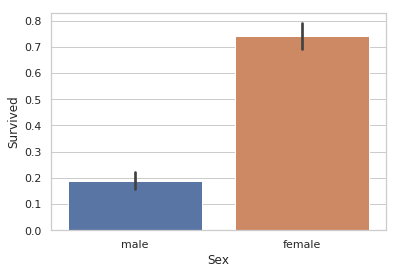

In [6]:
sns.barplot(x="Sex",y="Survived",data = train)
plt.show()

In [7]:
train[['Sex','Survived']].groupby('Sex').mean()*100

,Survived
Sex,
female,74.203822
male,18.890815


We can see that 74.2% of females survived compared to 18.89% of males. So females have much higher chance of survival.

#### Based on PClass

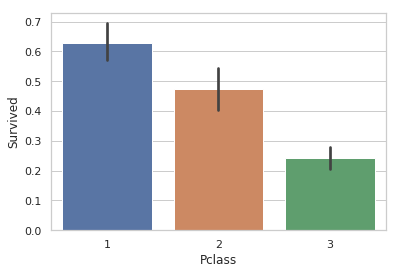

In [8]:
sns.barplot(x="Pclass",y="Survived",data = train)
plt.show()

In [9]:
train[['Pclass','Survived']].groupby('Pclass').mean()*100

,Survived
Pclass,
1,62.962963
2,47.282609
3,24.236253


62.96% of the people in Pclass 1 survived.

47.28% of the people in Pclass 2 survived.

24.23% of the people in Pclass 3 survived.



So people in Pclass 1 had a higher chance of survival and as the Pclass level increased, the rate of survival decreased.

#### Combining PClass and Sex

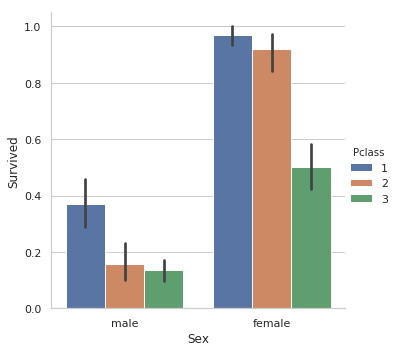

In [10]:
sns.catplot(x='Sex', y='Survived',  kind='bar', data=train, hue='Pclass')
plt.show()

From the above graph, we can see that almost all of the females in Pclass 1 survived.

So the females in PClass 1 and 2 had the highest chance to survive.

#### Based on SibSp

SibSp denotes the number of siblings and spouses

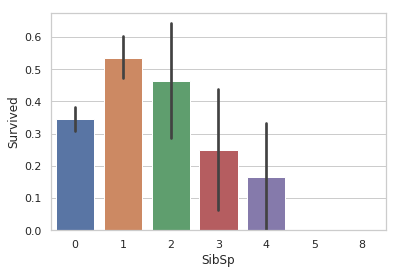

In [11]:
sns.barplot(x="SibSp",y="Survived",data = train)
plt.show()

People with 2 or less sibilings and spouses had more chance to survive as they looked after only less number of people.

In [12]:
train[['SibSp','Survived']].groupby("SibSp").mean()*100

,Survived
SibSp,
0,34.539474
1,53.588517
2,46.428571
3,25.000000
4,16.666667
5,0.000000
8,0.000000


34.53% of people with 0 sibilings or spouses survived.

53.58% of people with 1 sibiling or spouse survived. (More chance to survive as they helped each other)

46.42% of people with 2 sibilings or spouses survived 



#### Based on age

Now we can compare the rate of survival based on age.

But as several values of the age column is null, we need to modify age column. Instead of finding the age of each and every person, we can group each person on the basis of their age group(Like child,adult,elder etc.)

In [13]:
train["Age"] = train["Age"].fillna(-0.5)
test["Age"] = test["Age"].fillna(-0.5)
value = [-1, 0, 5, 12, 18, 30, 65, 100]
names = ['Missing', 'Baby', 'Child', 'Teen', 'Youth', 'Adult', 'Elder']
train['AgeGroup'] = pd.cut(train["Age"], value, labels = names)
test['AgeGroup'] = pd.cut(test["Age"], value, labels = names)




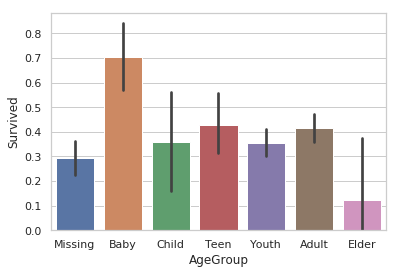

In [14]:
sns.barplot(x="AgeGroup", y="Survived", data=train)
plt.show()

Babies had the highest chance to survive as they were looked after by the adults. A baby would always have an adult accompanying him and at the time of rescue, these babies will be given more priority.

Elders had the least chance to survive as they became extremely fatigued.

### 5. Process the data 

Now we should remove the Null values from the dataset and get them ready for training

We have Null values in age column. To properly give a value to the missing places, we should compare it with the title(Mr, Mrs etc.) which is obtained from the name of the passenger.Through the title, we can estimate the approximate age of the passenger and add that value to the age column.

First we should extract title from all the names and add another column ("Title) to the dataset

In [15]:
train['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

By looking at the above output,we can see that the title is the second word. So we can extract the title from the second word of the name. Be careful to remove the punctuation marks.

In [16]:
for item in [train,test]:
    item['Title'] = item['Name'].str.split(',').str[1].str.split('.').str[0].str.strip()
    # Here we split the second word from the name and stripped the excess whitespaces.

In [17]:
pd.crosstab(train['Title'],train['Sex'])


Sex,female,male
Title,,
Capt,0,1
Col,0,2
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40
Miss,182,0


Earlier we have replaced Nan values in the age column with -0.5. We should replace that with Nan as -0.5 would interfere when calculating mode age.

In [18]:
train["Age"] = train["Age"].replace({-0.5:np.nan})
test["Age"] = test["Age"].replace({-0.5:np.nan})

From the above table we can see the relation between title and sex. We can compare it with the title of the passengers with the missing ages. We can replace the Nan value with the mode age of the correspoding title.

In [19]:
Null_List = train[train['Age'].isna()].groupby('Title').count()['Survived']
Null_Title = Null_List.index.values
Null_List

Title
Dr          1
Master      4
Miss       36
Mr        119
Mrs        17
Name: Survived, dtype: int64

The above output corresponds to the number of passengers with the age column as Nan. We can replace Nan with the mode age of the respective title

In [20]:
for item in Null_Title:
        val = train[train.Title == item]['Age'].median()
        train_list = train[(train.Title==item)& (train.AgeGroup == 'Missing')].index
        for elem in train_list:
            train.iloc[elem,train.columns.get_loc('Age')]=val
    

Now the missing Age values are filled (At least somewhat accurately). Repeat the same for test dataset.


In [21]:
Null_List = test[test['Age'].isna()].groupby('Title').count()['PassengerId']
Null_Title = Null_List.index.values
for item in Null_Title:
        val = train[train.Title == item]['Age'].median()
        test_list = test[(test.Title==item) & (test.AgeGroup == 'Missing')].index
        for elem in test_list:
            test.iloc[elem,test.columns.get_loc('Age')]=val
    

For the rest of the columns we can either drop them or map them with integer values(For better modelling)

#### Fare Column

We can map fare column into four groups from 1 to 4 based on its value. We can also fill the missing fare value in the test dataset.

In [22]:
# First we can fill the missing value

test[pd.isnull(test)['Fare']]




,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Title
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,Adult,Mr


So the fare of only one passenger is missing. To fill it, we can find the mean fare of the passengers in Pclass column.

In [23]:
val = int(test[pd.isnull(test)['Fare']].Pclass)
amount = round(test[test.Pclass ==val].Fare.mean())
id = test[pd.isnull(test)['Fare']].index
test.iloc[id,test.columns.get_loc('Fare')]=amount

Next we can map fare values into four groups based on its values

In [24]:
train['Fare'] = pd.cut(train['Fare'], 4, labels = [1, 2, 3, 4])
test['Fare'] = pd.cut(test['Fare'], 4, labels = [1, 2, 3, 4])

Check to see if there are any null values in the train dataset.

In [25]:
pd.isnull(train).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
AgeGroup         0
Title            0
dtype: int64

There are 687 values missing in the cabin column which is too much to predict. So we can drop the cabin column.

In [26]:
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

There are 2 missing values in Embarked column, we can fill that by taking the mode value in the Embarked column

In [27]:
print(train.groupby("Embarked").count()["Survived"])

Embarked
C    168
Q     77
S    644
Name: Survived, dtype: int64


The most repeating value in the Embarked column is S (Southampton) which is repeated 644 times.

So we can fill the missing values with "S"

In [28]:
train = train.fillna({"Embarked": "S"})

#### Name and Ticket column

We can drop both name and ticket column as they are no longer useful for us

In [29]:
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)
train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)

 #### Sex and Embarked column

We can map values in the sex column with numerical values (0 for male and 1 for female)


In [30]:
sex_num = {"male":0,"female":1}
train["Sex"] = train["Sex"].map(sex_num)
test["Sex"] = test["Sex"].map(sex_num)

We can map values in the Embarked column with numerical values (0 for male and 1 for female)

In [31]:
embarked_num = {"S": 1, "C": 2, "Q": 3}
train['Embarked'] = train['Embarked'].map(embarked_num)
test['Embarked'] = test['Embarked'].map(embarked_num)


Check for any null values

In [32]:
print(pd.isnull(test).sum())
print(pd.isnull(train).sum())

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
AgeGroup       0
Title          0
dtype: int64
PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
AgeGroup       0
Title          0
dtype: int64


No null values means we are almost ready for creating a model from the data

Check a sample of the train dataset

In [33]:
train.sample(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Title
146,147,1,3,0,27.0,0,0,1,1,Youth,Mr
468,469,0,3,0,30.0,0,0,1,3,Missing,Mr
778,779,0,3,0,30.0,0,0,1,3,Missing,Mr
175,176,0,3,0,18.0,1,1,1,1,Teen,Mr
366,367,1,1,1,60.0,1,0,1,2,Adult,Mrs


Since AgeGroup and Title contains string values, we need to replace them with integer values before creating the model

We can simply map the values in the AgeGroup with numerical values

In [34]:
group = list(map(str,train.AgeGroup.unique().sort_values()))
val = pd.Series(group)
print(val)

0    Missing
1       Baby
2      Child
3       Teen
4      Youth
5      Adult
6      Elder
dtype: object


Since we have already filled the missing ages, we don't require the missing column anymore.

In [35]:
value = [0, 5, 12, 18, 30, 65, 100]
names = ['Baby', 'Child', 'Teen', 'Youth', 'Adult', 'Elder']
train['AgeGroup'] = pd.cut(train["Age"], value, labels = names)
test['AgeGroup'] = pd.cut(test["Age"], value, labels = names)


In [36]:
group = list(map(str,train.AgeGroup.unique().sort_values()))
val = pd.Series(group)
print(val)

0     Baby
1    Child
2     Teen
3    Youth
4    Adult
5    Elder
dtype: object


In [37]:
item = val.to_dict()
item

{0: 'Baby', 1: 'Child', 2: 'Teen', 3: 'Youth', 4: 'Adult', 5: 'Elder'}

We need to invert this dict to properly map the AgeGroup column

In [38]:
item = {v: k for k, v in item.items()}
item

{'Baby': 0, 'Child': 1, 'Teen': 2, 'Youth': 3, 'Adult': 4, 'Elder': 5}

Now we can map AgeGroup with its respective numerical values

In [39]:
train['AgeGroup'] = train['AgeGroup'].map(item)
test['AgeGroup'] = test['AgeGroup'].map(item)


For the title column, we can replace various titles with their column names

In [40]:
train['Title'] = train['Title'].replace('Ms', 'Miss').replace('Mme', 'Mrs').replace('Mlle', 'Miss').replace(['Countess', 'Lady', 'Sir'], 'Royal').replace(['Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Special')
test['Title'] = test['Title'].replace('Ms', 'Miss').replace('Mme', 'Mrs').replace('Mlle', 'Miss').replace(['Countess', 'Lady', 'Sir'], 'Royal').replace(['Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Special')

title_num = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Special": 6}
train['Title'] = train['Title'].map(title_num)
train['Title'] = train['Title'].fillna(0)
test['Title'] = test['Title'].map(title_num)
test['Title'] = test['Title'].fillna(0)

That's it we're good to go. Let's get to modelling.

### Selecting the best model

I will be using 5 different models to test the data and will select the best one out of it.

The models used are:

1. Logistic Regression
2. Support Vector Machines (SVM)
3. K-Nearest Neighbours (KNN)
4. Gradient Boosting Classifier
5. Random Forest Classifier

First we need to split the train dataset to compare the prediction of models.

In [41]:
from sklearn.model_selection import train_test_split

predictors = train.drop(['Survived', 'PassengerId'], axis=1)
target = train["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, random_state = 0)

#### 1. Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_predict = logreg.predict(x_val)
result1 = round(accuracy_score(y_predict, y_val) * 100, 2)
print(result1)

78.48


#### 2. Support Vector Matrices

In [43]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc = SVC()
svc.fit(x_train, y_train)
y_predict = svc.predict(x_val)
result2 = round(accuracy_score(y_predict, y_val) * 100, 2)
print(result2)



82.06


#### 3. K-Nearest Neighbours

In [44]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_predict = knn.predict(x_val)
result3 = round(accuracy_score(y_predict, y_val) * 100, 2)
print(result3)

78.03


#### 4. Gradient Boosting Classifier

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_predict = gbk.predict(x_val)
result4 = round(accuracy_score(y_predict, y_val) * 100, 2)
print(result4)

82.96


#### 5.Random Forest Classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_predict = randomforest.predict(x_val)
result5 = round(accuracy_score(y_predict, y_val) * 100, 2)
print(result5)

79.37


Compare all the models

In [47]:
model = ["Logistic Regression","Support Vector Machines (SVM)","K-Nearest Neighbours (KNN)","Gradient Boosting Classifier","Random Forest Classifier"]
value = [result1,result2,result3,result4,result5]
result = pd.DataFrame({"Model":model,"Value":value}).sort_values(by="Value", ascending = False)
result

,Model,Value
3,Gradient Boosting Classifier,82.96
1,Support Vector Machines (SVM),82.06
4,Random Forest Classifier,79.37
0,Logistic Regression,78.48
2,K-Nearest Neighbours (KNN),78.03


So the best model is Gradient Boosting Classifier. We can use it to predict the survival of test dataset.

### Creating the submission file

We require two columns: PassengerId and Survived of the test dataset.

In [48]:
index = test['PassengerId']
prediction = gbk.predict(test.drop('PassengerId', axis=1))

output = pd.DataFrame({ 'PassengerId' : index, 'Survived': prediction })
output.to_csv('submission.csv', index=False)